# Unsupervised Machine Learning - Clustering


### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Revenue Analysis
      2A. Data Cleaning
      2B. The elbow technique
      2C. k-means clustering
#### 3. Assessment Score Analysis 
      3A. Data Cleaning
      3B. The elbow technique
      3C. k-means clustering



Due to the nature of my dataset I cannot perform my unsupervised analysis with all the variables I want on **one** dataset. 
The reaosn for that is: There is a revenue value for each state in each year, **but** the assessment scores are only available for odd years. Also, due to the small size of the demographic groups, there are far too many NULL values for different demographic groups across different years. NCES does not report any average score for demographic groups of smaller sizes. 

### 1.  Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # import the k-means algorithm from scikit-learn
import pylab as pl # Convenience module to bulk import matplotlib

In [2]:
# To ensures the graphs are displayed in the notebook:
%matplotlib inline

In [3]:
path = r'/Users/azadehrezaei/Desktop/NAEP Results Analysis'

In [4]:
# Importing the assessment results:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'states_all_extended_assessment_levels.csv'))

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,...,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS,Grade 4 Math Level,Grade 8 Math Level,Grade 4 Reading Level,Grade 8 Reading Level
0,0,0,2003_ALABAMA,Alabama,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NAEP Basic Level,NAEP Basic Level,Under NAEP Basic Level,NAEP Basic Level
1,1,1,2003_ALASKA,Alaska,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NAEP Basic Level,NAEP Basic Level,NAEP Basic Level,NAEP Basic Level
2,2,2,2003_ARIZONA,Arizona,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NAEP Basic Level,NAEP Basic Level,NAEP Basic Level,NAEP Basic Level
3,3,3,2003_ARKANSAS,Arkansas,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NAEP Basic Level,NAEP Basic Level,NAEP Basic Level,NAEP Basic Level
4,4,4,2003_CALIFORNIA,California,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NAEP Basic Level,NAEP Basic Level,Under NAEP Basic Level,NAEP Basic Level


## Revenue Analysis

### 2A. Data Cleaning:

In [6]:
df_rev = df[['YEAR', 'STATE', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE']]


In [7]:
df_rev = df_rev[df_rev['YEAR'] > 2002]


In [8]:
df_rev = df_rev.drop(df_rev[df_rev['STATE'].isin(['NATIONAL', 'DODEA'])].index)

In [9]:
df_rev.isnull().sum(axis = 0)

YEAR                            0
STATE                           0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
dtype: int64

In [10]:
df_rev = df_rev.drop(columns = ['STATE'])

I dropped the categorical columns from the original df set. I also decreased the size of this set by only keeping the revenue columns, removing the states labeled as DODEA and NATIONAL and keeping only the values for the years 2003 and after. No unknown values anymore. 

In [11]:
# Checking for null values
df_rev.isnull().sum(axis = 0)

YEAR                            0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
dtype: int64

### 2B. The Elbow Technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned 


In [13]:
# Creates a score for a rate of variation for the given cluster

score = [kmeans[i].fit(df_rev).score(df_rev) for i in range(len(kmeans))] 

score


[-4.7197202478799155e+17,
 -1.548736647855449e+17,
 -6.232183263038792e+16,
 -4.083303255343207e+16,
 -2.9799546349707148e+16,
 -2.192438125665689e+16,
 -1.8523471818871504e+16,
 -1.5463084607589122e+16,
 -1.3153972604454292e+16]

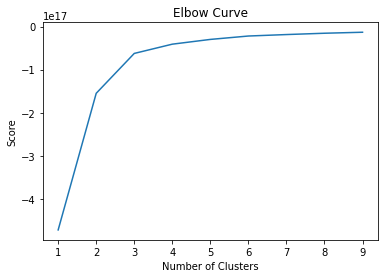

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There are 3 clusters here! 

### 2C. K-means Clsutering

In [15]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3) 

In [16]:
# Fit the k-means object to the data

kmeans.fit(df_rev)

KMeans(n_clusters=3)

In [17]:
df_rev['rev_clusters'] = kmeans.fit_predict(df_rev)

In [18]:
df_rev['rev_clusters'].value_counts()

1    624
2    151
0     41
Name: rev_clusters, dtype: int64

In [19]:
df_rev.head()

,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,rev_clusters
0,2003,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,1521462.0,424662.0,432279.0,1
1,2003,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,514052.0,55715.0,247005.0,1
2,2003,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,1964229.0,303924.0,864642.0,1
3,2003,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,972598.0,170767.0,247245.0,1
4,2003,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,2995767.0,7341541.0,0


In [20]:
# Exporting the updated dataset:
df_rev.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'rev_clusters.csv'))

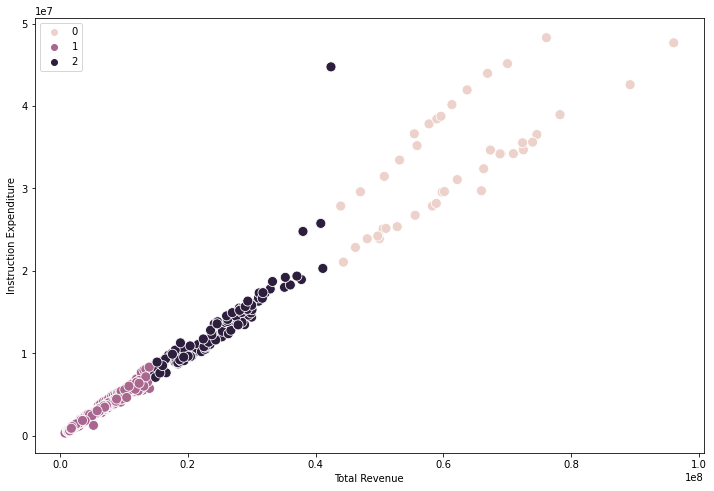

In [21]:
# Plot the clusters for the "TOTAL_REVENUE" and "INSTRUCTION_EXPENDITURE" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_rev['TOTAL_REVENUE'], y=df_rev['INSTRUCTION_EXPENDITURE'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Total Revenue') 
plt.ylabel('Instruction Expenditure') 
plt.show()

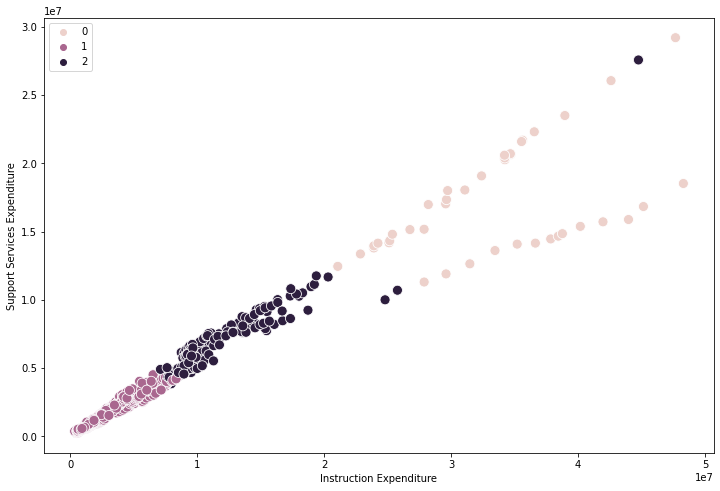

In [22]:
# Plot the clusters for the "INSTRUCTION_EXPENDITURE" and "SUPPORT_SERVICES_EXPENDITURE" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_rev['INSTRUCTION_EXPENDITURE'], y=df_rev['SUPPORT_SERVICES_EXPENDITURE'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Instruction Expenditure') 
plt.ylabel('Support Services Expenditure') 
plt.show()

In [23]:
df_rev.loc[df_rev['rev_clusters'] == 2, 'rev_clusters'] = 'dark purple'
df_rev.loc[df_rev['rev_clusters'] == 1, 'rev_clusters'] = 'purple'
df_rev.loc[df_rev['rev_clusters'] == 0, 'rev_clusters'] = 'pink'

In [24]:
df_rev.groupby('rev_clusters').agg({'TOTAL_REVENUE':['mean', 'median'], 
                         'STATE_REVENUE':['mean', 'median'], 
                         'INSTRUCTION_EXPENDITURE':['mean', 'median'],
                          'SUPPORT_SERVICES_EXPENDITURE':['mean', 'median']})

TOTAL_REVENUE             STATE_REVENUE              \
                      mean      median          mean      median   
rev_clusters                                                       
dark purple   2.285533e+07  21623923.0  9.221036e+06   9336277.0   
pink          6.179985e+07  59815855.0  2.862164e+07  24830862.0   
purple        5.626533e+06   4727917.5  2.843829e+06   2593563.0   

             INSTRUCTION_EXPENDITURE             SUPPORT_SERVICES_EXPENDITURE  \
                                mean      median                         mean   
rev_clusters                                                                    
dark purple             1.205056e+07  10829189.0                 7.071412e+06   
pink                    3.327615e+07  34194878.0                 1.704358e+07   
purple                  2.890429e+06   2424477.0                 1.703137e+06   

                          
                  median  
rev_clusters              
dark purple    6796495.0  
pink          15714795.0  
purple         1469474.0

- If a state has a higher total revenue, then that state has a higher alocated instruction expenidture.


In the supervised analysis part of my project I already noticed the same linear trends in the scatetr plots above (the Total Revenue vs. Instruction Expenditure and the Instruction Expenditure vs. Support Services Expenditure). 
There does not seem that the unsupervised analysis is giving us any more insights at this point. 
The onlu interesting observation in my opinion is the comparison of the second clusters (cluster 2) in the two charts. These two clusters show the states with the highest Total Revenues/Instruction Expenditures. It is interesting to see that proportional to their higher Total Revenue these states choose to spend **more** than expected on their Instruction Expendictures **but** they choose to spend less than expected on the Support Services. 
Unfortunate, to say the least! 

Well, this didn't really uncover much, so I am going to dive into the other hypothesis which is:


- If a state has a higher Instruction Expenditure, then the average Mathematics and Reading Assessment scores (in either 4th or 8th grade level) in that state are higher. 



## 3. Assessment Score Analysis

### 3A. Data Cleaning:

Since there is no NAEP assessment in the even years I first need to clean the data to only reflect the years where we have assessment scores for. 
- I am creating a new subset that will include the following columns:
   - 'STATE', 'YEAR', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
     'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
     'CAPITAL_OUTLAY_EXPENDITURE', 'G04_A_A_READING','G04_A_A_MATHEMATICS', 'G08_A_A_READING',   'G08_A_A_MATHEMATICS'

- I will then remove the states named "DODEA", and "NATIONAL" and eliminate the rows that associate with the even years

In [25]:
df_A_scores = df[['STATE', 'YEAR', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 
       'G04_A_A_READING','G04_A_A_MATHEMATICS', 
       'G08_A_A_READING', 'G08_A_A_MATHEMATICS']]

In [26]:
df_A_scores = df_A_scores[df_A_scores['YEAR'].isin([2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])]

In [27]:
df_A_scores = df_A_scores.drop(df_A_scores[df_A_scores['STATE'].isin(['NATIONAL', 'DODEA'])].index)

In [28]:
df_A_scores.isnull().sum(axis = 0) # Awesome, no NULL values anymore! 

STATE                           0
YEAR                            0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
G04_A_A_READING                 0
G04_A_A_MATHEMATICS             0
G08_A_A_READING                 0
G08_A_A_MATHEMATICS             0
dtype: int64

In [29]:
df_A_scores

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,G04_A_A_READING,G04_A_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS
0,Alabama,2003,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,1521462.0,424662.0,432279.0,207.0,223.0,253.0,262.0
1,Alaska,2003,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,514052.0,55715.0,247005.0,212.0,233.0,256.0,279.0
2,Arizona,2003,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,1964229.0,303924.0,864642.0,209.0,229.0,255.0,271.0
3,Arkansas,2003,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,972598.0,170767.0,247245.0,214.0,229.0,258.0,266.0
4,California,2003,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,2995767.0,7341541.0,206.0,227.0,251.0,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Virginia,2019,17606867.0,1169845.0,7074761.0,9362261.0,17849027.0,9893290.0,5789282.0,690367.0,1476088.0,224.0,247.0,262.0,287.0
812,Washington,2019,19369526.0,1066984.0,13397370.0,4905172.0,19646115.0,9537723.0,5883783.0,651947.0,3572662.0,220.0,240.0,266.0,286.0
813,West Virginia,2019,3540869.0,402311.0,1958332.0,1180226.0,3471973.0,1856310.0,1168220.0,231917.0,215526.0,213.0,231.0,256.0,272.0
814,Wisconsin,2019,12393896.0,820330.0,6823763.0,4749803.0,12268219.0,6365263.0,4031991.0,519321.0,1351644.0,220.0,242.0,267.0,289.0


In [30]:
# Removing the categorical columns now
df_A_scores = df_A_scores.drop(columns = ['STATE'])

### 3B. The Elbow Technique

In [31]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned 

In [32]:
# Creates a score for a rate of variation for the given cluster

score = [kmeans[i].fit(df_A_scores).score(df_A_scores) for i in range(len(kmeans))] 

score



[-2.699692706166607e+17,
 -9.127240541129656e+16,
 -3.7193062061186e+16,
 -2.4667432261306564e+16,
 -1.891409125158348e+16,
 -1.373741123996581e+16,
 -1.139063882111819e+16,
 -9512836775302272.0,
 -7914247267988398.0]

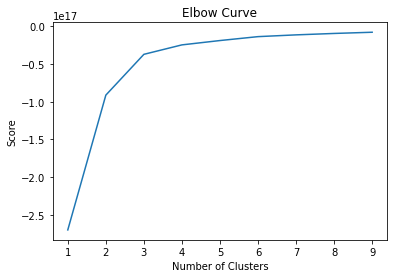

In [33]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3C. k-Means Clustering

In [34]:
# Create the k-means object - Looks like I have 3 clusters again

kmeans = KMeans(n_clusters = 3) 

In [35]:
# Fit the k-means object to the data

kmeans.fit(df_A_scores)

KMeans(n_clusters=3)

In [36]:
df_A_scores['score_clusters'] = kmeans.fit_predict(df_A_scores)

In [37]:
df_A_scores['score_clusters'].value_counts()

0    349
2     87
1     23
Name: score_clusters, dtype: int64

In [38]:
df_A_scores.head()

,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,G04_A_A_READING,G04_A_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,score_clusters
0,2003,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,1521462.0,424662.0,432279.0,207.0,223.0,253.0,262.0,0
1,2003,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,514052.0,55715.0,247005.0,212.0,233.0,256.0,279.0,0
2,2003,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,1964229.0,303924.0,864642.0,209.0,229.0,255.0,271.0,0
3,2003,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,972598.0,170767.0,247245.0,214.0,229.0,258.0,266.0,0
4,2003,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,2995767.0,7341541.0,206.0,227.0,251.0,267.0,1


In [39]:
# Exporting the dataset:
df_A_scores.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'score_clusters.csv'))

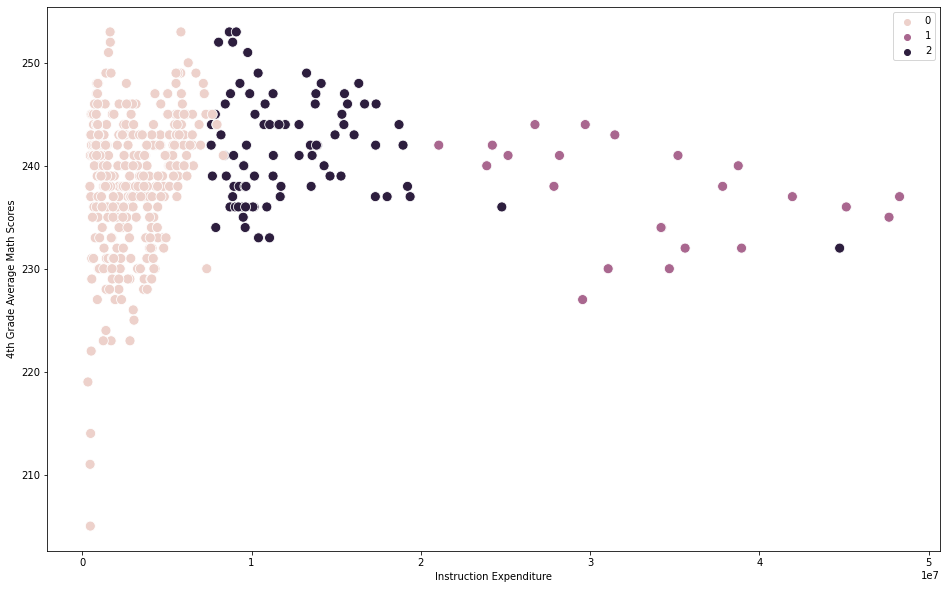

In [40]:
# Plot the clusters for the "INSTRUCTION_EXPENDITURE" and "G04_A_A_MATHEMATICS" variables

plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=df_A_scores['INSTRUCTION_EXPENDITURE'], y=df_A_scores['G04_A_A_MATHEMATICS'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Instruction Expenditure') 
plt.ylabel('4th Grade Average Math Scores') 
plt.show()

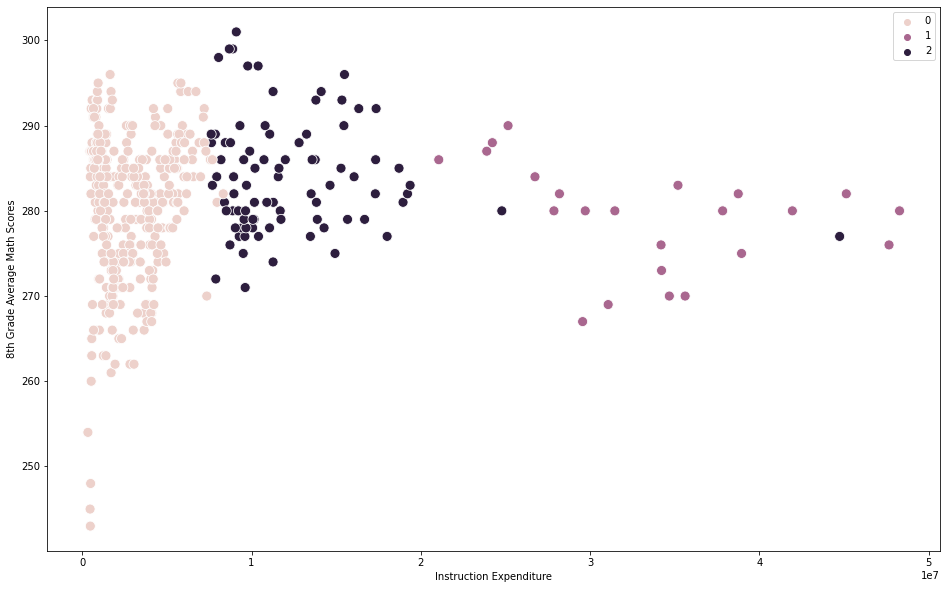

In [41]:
# Plot the clusters for the "INSTRUCTION_EXPENDITURE" and "G08_A_A_MATHEMATICS" variables

plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=df_A_scores['INSTRUCTION_EXPENDITURE'], y=df_A_scores['G08_A_A_MATHEMATICS'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Instruction Expenditure') 
plt.ylabel('8th Grade Average Math Scores') 
plt.show()

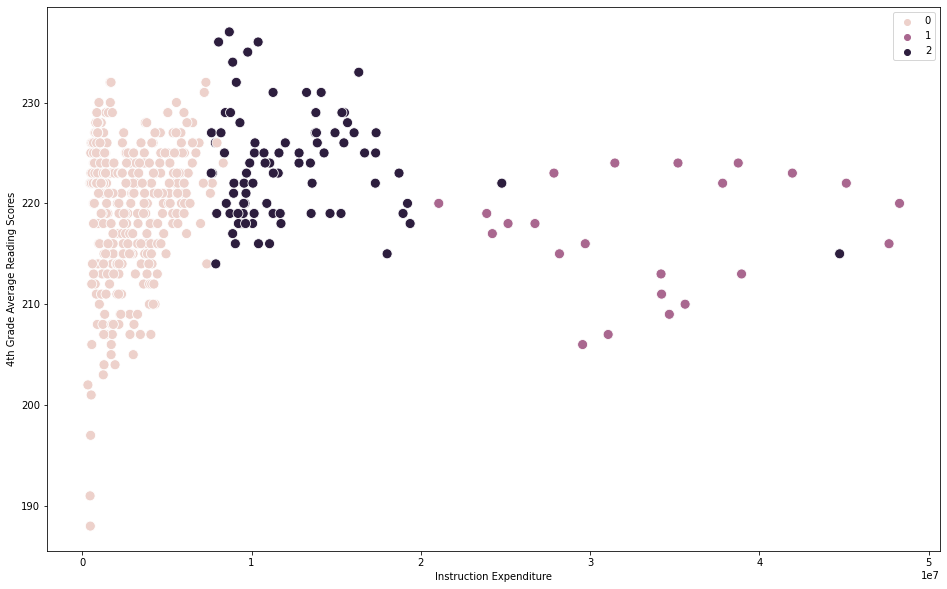

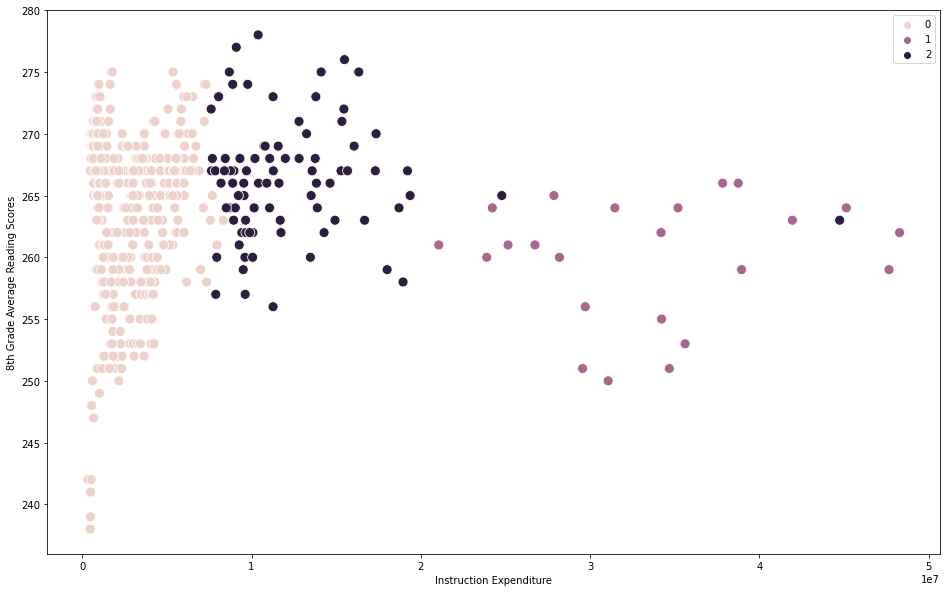

In [42]:
# Plot the clusters for the "INSTRUCTION_EXPENDITURE" and "G04_A_A_READING" variables

plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=df_A_scores['INSTRUCTION_EXPENDITURE'], y=df_A_scores['G04_A_A_READING'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Instruction Expenditure') 
plt.ylabel('4th Grade Average Reading Scores') 
plt.show()

plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=df_A_scores['INSTRUCTION_EXPENDITURE'], y=df_A_scores['G08_A_A_READING'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Instruction Expenditure') 
plt.ylabel('8th Grade Average Reading Scores') 
plt.show()

In [43]:
df_A_scores.loc[df_A_scores['score_clusters'] == 2, 'score_cluster'] = 'dark purple'
df_A_scores.loc[df_A_scores['score_clusters'] == 1, 'score_cluster'] = 'purple'
df_A_scores.loc[df_A_scores['score_clusters'] == 0, 'score_cluster'] = 'pink'

In [44]:
df_A_scores.groupby('score_cluster').agg({'INSTRUCTION_EXPENDITURE':['mean', 'median'], 
                         'G04_A_A_MATHEMATICS':['mean', 'median'],
                         'G08_A_A_MATHEMATICS':['mean', 'median'],
                         'G04_A_A_READING':['mean', 'median'],
                         'G08_A_A_READING':['mean', 'median']})

INSTRUCTION_EXPENDITURE             G04_A_A_MATHEMATICS         \
                                 mean      median                mean median   
score_cluster                                                                  
dark purple              1.223475e+07  10800145.0          241.597701  242.0   
pink                     2.888096e+06   2436918.0          238.515759  239.0   
purple                   3.354207e+07  34194878.0          237.304348  238.0   

              G08_A_A_MATHEMATICS        G04_A_A_READING         \
                             mean median            mean median   
score_cluster                                                     
dark purple            284.000000  283.0      223.563218  223.0   
pink                   280.478510  282.0      219.318052  221.0   
purple                 279.130435  280.0      216.956522  218.0   

              G08_A_A_READING         
                         mean median  
score_cluster                         
dark purple        266.367816  266.0  
pink               263.223496  265.0  
purple             259.869565  261.0

The unsupervised analysis on 4th and 8th grade Math and Reading assessment scores vs. the Instruction Expenditure shows the same treand overall. 
What all the clusters show that the instruction expenditure has not been a main factor in assessment scores. As we can see from the main cluster by the y-axis in every single chart. 

Let's specificaly talk about one of the graphs, the 4th Grade Mathematics Scores (the first chart):

- Majority of scores are in the purple cluster. This means these scores are associated with the lowest Instruction Expenditure. Although this might mean that maybe states can get away with allocating less revenue to the instruction expenditures, it's also important to notice that the number of lower scores in this category is the highest. 
- The average score in the purple cluster is 238 which is above the Basic NAEP math Standars (214) but below the NAEP Proficient score (249). 

Comparing the two other clusters in this chart is very interesting as well. What they have in common is that the average score in the pink category is higher than purple 241, AND higher than the dark purple category (237). This is intersting because the dark purple cluster represents states that have higher Total Revenues AND have allocated higher Instruction Expenditure. 
The Pink cluster also has the least number of low scores. 

Between the 3 clusters/groups it seems like the Pink cluster has made the best use of their resources. The Purple cluster is getting away with doing the minimum and meeting the minimum requirements and the dark purple cluster .. well they're doing something very wrong! They are spending the most and not getting good enough results. 

To follow up on this project, it will be interesting to isolate the states in each cluster and look at the state/school policies that are spending so much money and not getting proportional results! 

### Student Demographics

I'd have loved to perform unsupervised analysis on all demographic groups but upon cleaning the data there are fewer than 100 rows with values for all categories. 
Based on the data source and data gathering information there have not been a big enough samples in all years for all demographic groups to permit reliable estimates due to the size of each group and therefore unsupervised analysis on a subset of this size doesn't seem reasonable. 

I am however going to lopk at the descriptive analysis results  of the dataset:

In [49]:
# just cleaning up and creating a dataset for assessment scores only:
df_dem = df[df['YEAR'].isin([2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])]

In [50]:
df_dem = df_dem.drop(df_dem[df_dem['STATE'].isin(['NATIONAL', 'DODEA'])].index)

In [51]:
df_dem = df_dem.drop(columns = ['STATE', 'YEAR'])

- The represented races include:

      AM (American Indian or Alaska Native)
      AS (Asian), HI (Hispanic/Latino)
      BL (Black or African American)
      WH (White) 
      HP (Hawaiian Native/Pacific Islander) 
      TR (Two or More Races) 

- The represented genders include M (Male) and F (Female).

### Mathematics:

In [52]:
# 4th grade mathematics:
df_dem[['G04_A_A_MATHEMATICS','G04_A_M_MATHEMATICS','G04_A_F_MATHEMATICS', 'G04_WH_A_MATHEMATICS', 'G04_BL_A_MATHEMATICS','G04_HI_A_MATHEMATICS', 'G04_AS_A_MATHEMATICS', 'G04_AM_A_MATHEMATICS', 'G04_HP_A_MATHEMATICS', 'G04_TR_A_MATHEMATICS']] .describe().T
       
       
       

,count,mean,std,min,25%,50%,75%,max
G04_A_A_MATHEMATICS,459.0,239.039216,6.260937,205.0,236.00,240.0,243.0,253.0
G04_A_M_MATHEMATICS,459.0,239.989107,6.528230,204.0,237.00,241.0,244.0,255.0
G04_A_F_MATHEMATICS,459.0,237.995643,6.060825,206.0,235.00,239.0,242.0,253.0
G04_WH_A_MATHEMATICS,255.0,248.282353,5.847696,232.0,245.00,248.0,251.0,276.0
G04_BL_A_MATHEMATICS,219.0,223.041096,5.562254,211.0,219.00,223.0,227.0,239.0
G04_HI_A_MATHEMATICS,240.0,230.083333,5.174096,218.0,226.00,229.0,234.0,245.0
G04_AS_A_MATHEMATICS,158.0,257.930380,9.149931,227.0,252.25,259.0,264.0,275.0
G04_AM_A_MATHEMATICS,58.0,222.172414,6.741175,208.0,218.00,221.0,225.0,238.0
G04_HP_A_MATHEMATICS,10.0,223.400000,6.131884,212.0,221.25,223.5,227.5,232.0
G04_TR_A_MATHEMATICS,173.0,242.104046,6.270143,228.0,238.00,241.0,247.0,259.0


The NAEP Mathematics Achievement Levels by Grade
- Grade 4 Mathematics:

  <p> - NAEP Basic 214 </p>
  <p> - NAEP Proficient 249 </p>
  <p> - NAEP Advanced 282 </p>

The minimum value is under the Basic NAEP standard and the Maximum value is under the Advanced level which means we have no record of anyone scoring above this level. 

The Average score in this level is under the proficient level and above basic which means the majority of students score above basic in math at this level. 

There are almost the same number of students in White, Black and Hispanic demographic groups at this level. The White demographic has the highest average, followed by the Hispanic and then the Black demographic group. 

There are not enough number of students in the Asian, American Indian and the Hawaiian Native/Pacific Islander groups BUT looking at what we do have, the Asian demographic has the highest average score of all, above the proficient level, and the American Indian group has the lowest average, hardly reaching the basic NAEP standards. 

In [53]:
# 8th grade mathematics:
df_dem[['G08_A_A_MATHEMATICS','G08_A_M_MATHEMATICS','G08_A_F_MATHEMATICS', 'G08_WH_A_MATHEMATICS', 'G08_BL_A_MATHEMATICS','G08_HI_A_MATHEMATICS', 'G08_AS_A_MATHEMATICS', 'G08_AM_A_MATHEMATICS', 'G08_HP_A_MATHEMATICS', 'G08_TR_A_MATHEMATICS']] .describe().T
       
       
       

,count,mean,std,min,25%,50%,75%,max
G08_A_A_MATHEMATICS,459.0,281.078431,8.087563,243.0,276.5,282.0,286.0,301.0
G08_A_M_MATHEMATICS,459.0,281.405229,8.301711,242.0,277.0,283.0,287.0,301.0
G08_A_F_MATHEMATICS,459.0,280.712418,7.958138,244.0,276.0,282.0,286.0,300.0
G08_WH_A_MATHEMATICS,255.0,291.627451,7.261593,272.0,288.0,291.0,295.0,323.0
G08_BL_A_MATHEMATICS,211.0,260.090047,6.229457,248.0,255.5,260.0,264.0,277.0
G08_HI_A_MATHEMATICS,238.0,269.689076,5.708455,255.0,266.0,269.5,273.0,285.0
G08_AS_A_MATHEMATICS,147.0,307.034014,11.281221,277.0,301.0,309.0,314.0,332.0
G08_AM_A_MATHEMATICS,55.0,260.563636,6.732353,240.0,257.0,260.0,264.0,275.0
G08_HP_A_MATHEMATICS,8.0,260.375000,5.998512,250.0,257.0,260.5,264.0,268.0
G08_TR_A_MATHEMATICS,135.0,283.696296,7.765475,266.0,279.0,284.0,288.0,305.0


The NAEP Mathematics Achievement Levels by Grade

- Grade 8 Mathematics:

  <p> - NAEP Basic 262 </p>
  <p> - NAEP Proficient 299 </p>
  <p> - NAEP Advanced 333 </p>


The average score in this group is 281, which is abover the Basic level and below the Proficient level. Same as in 4th grade math assessments, the maximum value in this group is still below the Advanced level, meaning no student scored at or above the NAEP Advanced level in 8th grade math. 
Female and male groups score very close in average, minimum and maximum values! Equality!!

Once again, there is not enough representation across all demographics which makes it hard to make any comparisons BUT, with what we have:

We can make comparisons between white, black and hispanic subgroups as we have almost equal number of students in these three groups. White students have the highest average score, 291, very close to the proficient value, followed by Hispanic students scoring an average slightly above the Basic level and then the black students with an average score below the NAEP Basic level in 8th grade math. 

There are only 8 Hawaiian Native/Pacific Islander students and 55 American Indians represented. 

Not considering the unequal number of students in each subgroup, Asian students have the highest average score above the proficient level, 307, followed by White students and students of Two or More races. 


### Reading:

In [54]:
# 4th grade reading:
df_dem[['G04_A_A_READING','G04_A_M_READING','G04_A_F_READING', 'G04_WH_A_READING', 'G04_BL_A_READING','G04_HI_A_READING', 'G04_AS_A_READING', 'G04_AM_A_READING', 'G04_HP_A_READING', 'G04_TR_A_READING']] .describe().T
       
       
       

,count,mean,std,min,25%,50%,75%,max
G04_A_A_READING,459.0,220.004357,6.660512,188.0,216.0,221.0,224.5,237.0
G04_A_M_READING,459.0,216.555556,6.993343,182.0,213.0,218.0,221.0,234.0
G04_A_F_READING,459.0,223.581699,6.440132,195.0,220.0,225.0,228.0,239.0
G04_WH_A_READING,255.0,229.917647,6.484770,214.0,226.0,229.0,233.0,260.0
G04_BL_A_READING,216.0,204.129630,6.455706,188.0,199.0,204.0,209.0,223.0
G04_HI_A_READING,240.0,208.587500,5.916491,196.0,204.0,208.0,212.0,226.0
G04_AS_A_READING,154.0,235.694805,10.529962,199.0,228.0,236.0,244.0,255.0
G04_AM_A_READING,59.0,196.491525,10.807681,169.0,191.0,198.0,202.0,223.0
G04_HP_A_READING,11.0,198.090909,7.942979,184.0,194.5,199.0,202.0,211.0
G04_TR_A_READING,173.0,223.919075,7.301189,203.0,219.0,223.0,228.0,253.0


The NAEP Reading Achievement Levels by Grade
- Grade 4 Reading:

  <p> - NAEP Basic 208 </p>
  <p> - NAEP Proficient 238 </p>
  <p> - NAEP Advanced 268 </p>


The average score across all groups is above Basic NAEP level, as expected. In this category, female students have done slightly better than male students with a higher average score. 

Once again we have enough data points in White, Black and Hispanic subgroups; and once again White students have the highest average score, 229, followed by Hispanic students scoring an average of 208, which is the exact NAEP Basic level standard (so not that good) and then Black students scoring an average below the Basic level (so we can say bad). 

 Same as before, not enough representation in other demographics. For example, we only have 11 data points for Hawaiian Native/Pacific Islander students and they actually have a very low average (198), minimum (184) and maximum (211, hardly meeting the Basic level) values. 
 
The asian subgroup is scoring an average slightly higher than white students and American Indian subgroup of 59 records has the lowest average (196) of all other demographic groups.  


In [55]:
# 8th grade reading:
df_dem[['G08_A_A_READING','G08_A_M_READING','G08_A_F_READING', 'G08_WH_A_READING', 'G08_BL_A_READING','G08_HI_A_READING', 'G08_AS_A_READING', 'G08_AM_A_READING', 'G08_HP_A_READING', 'G08_TR_A_READING']] .describe().T
       
       
       

,count,mean,std,min,25%,50%,75%,max
G08_A_A_READING,459.0,263.651416,6.434797,238.0,260.00,265.0,268.0,278.0
G08_A_M_READING,459.0,258.488017,6.719372,230.0,254.00,260.0,263.0,273.0
G08_A_F_READING,459.0,268.943355,6.362851,245.0,265.00,270.0,273.0,282.0
G08_WH_A_READING,255.0,272.733333,5.780045,256.0,270.00,272.0,275.0,300.0
G08_BL_A_READING,212.0,247.174528,5.519694,235.0,243.75,247.0,251.0,261.0
G08_HI_A_READING,236.0,254.478814,5.015251,239.0,251.00,254.0,258.0,266.0
G08_AS_A_READING,143.0,279.769231,9.254380,257.0,273.50,281.0,286.0,298.0
G08_AM_A_READING,56.0,246.285714,7.824703,229.0,241.00,246.0,251.5,261.0
G08_HP_A_READING,9.0,244.555556,4.798727,234.0,243.00,245.0,248.0,250.0
G08_TR_A_READING,131.0,267.587786,7.048044,249.0,262.50,267.0,272.0,291.0


The NAEP Reading Achievement Levels by Grade

- Grade 8 Reading:

  <p> - NAEP Basic 243 </p>
  <p> - NAEP Proficient 281 </p>
  <p> - NAEP Advanced 323 </p>
  
Once again the overall average is above the Basic NAEP level.
The female subgroup is again performing slightly better in 8th grade Reading assessment witha minimum value abover the Basic level and a maximum value above the proficient level. The male subgroup has an average above the basic level and a minimum under the basic and a maximum below proficient level. So to summarize this: Females are doing much better overall in 8th grade reading assessment. 

Same exact story as before across White, Black and Hispanic subgroups with White students scoring the highest between the three (above the Basic level), followed by Hispanic students scoring an average above basic but not as good as White students and then Black students with an averag hardly above the Basic level. 

There are only 9 Hawaiian Native/Pacific Islander students and 56 American Indian students in this group. 

Disregarding the unequal number of records in across all subgroups, Asian studenst have the highest average score of all, followed closely by White students and then students of Two or More races. The lowest average score belongs to Hawaiian Native/Pacific Islander students with an average score hardly above the Basic level.

**My final thoughts:**

Although there are some small differences across different categories, it seems like White students are consistently performing well, followed by Hispanic students and then Black students. Lack of enough data in other subgroups makes it hard to make any conclusions about them. 

Considering the Revenue and Instruction Expenditure allocations either the policies are somehow benefiting the subgroups of students that need the least help in their performance, OR, the resources are allocated incorrectly and are not used to create an equitable learning environment for all students. 
Just my thoughts of course! 

These conclusions and findings can/should be used as a reason to look into where we are making mistakes in the way we educate our students in schools across the country. 



